# Taft Plot Investigations

This workbook contains the code and imports the data to explore how Taft used acid and base-catalyzed ester hydrolysis to develope the taft steric and electronic parameters.

## Acid and base Hydrolysis

We will compare the reaction constants, $\rho$, for the acidic and alkaline hydrolysis of esters. We will use m- and p-substituteted benzoates so that we can use the Hammett $\sigma$ parameters. The data is presented in tables 1 and 2 of the handout and is collected in csv data files named accordingly.

## Setup Tools and Read Substituent Data Table

Here the data table for Steric substitutent constants is read in and processed. Also the libraries are imported and any functions defined

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_17/data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"


#################################################################
### a function to fill in sigma for empty spaces in s+ and s- ###
#################################################################

def fill_sigma(df):     
    for z in df.index:
        if np.isnan(df.loc[z,"s_plus"]):
            df.loc[z,"s_plus"] = df.loc[z,"sigma"]
        if np.isnan(df["s_minus"][z]):
            df.loc[z,"s_minus"] = df.loc[z,"sigma"]
    return(df)


In [2]:
################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################

#LFER_file = "Taft_Es_Williams.csv"   
#LFER_file = "LFER_HanschLeoTaft.csv"   
LFER_file = "LFER_Williams.csv"   ### NEEDS TO BE HAMMETT FOR THIS SHEET

data_set = pd.read_csv(github_location_LFER_tables + LFER_file,
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 

#display(data_set)

########################################################
### Fill across sigma values and select substituents ###
########################################################

data_set=fill_sigma(data_set)
#display(data_set)

###############################
### Remove unneeded columns ###
###############################

if LFER_file == "LFER_HanschLeoTaft.csv":
    data_set.drop(labels = ["TABLE V", "TABLE I"],      #Trim "LFER_HanschLeoTaft.csv" data
    axis = 1,
    inplace = True)
elif LFER_file == "LFER_Williams.csv":
    data_set.drop(labels = ["Page"],                   #Trim "LFER_Williams.csv"" data
    axis = 1,
    inplace = True)
else:
    print("ERROR: No filename")

#######################################
### Sort by Steric Size and display ###
#######################################

#data_set.sort_values(by=['sigma'], inplace=True)
#data_set.sort_values(by=["E'(s)"], inplace=True)

display(data_set.head())

,sigma,s_plus,s_minus
Substituent,,,
m-Br,0.39,0.39,0.39
p-Br,0.23,0.15,0.25
m-C6H5,0.06,0.06,0.06
p-C6H5,-0.01,0.02,-0.18
m-CCCH3,0.10,0.10,0.10


## Read Experimental Data for Acid Hydrolysis
Here the data from the publication is read in. It had been saved in a csv file. the data is from...

"The activation energy of organic reactions. Part III. The kinetics of acid hydrolysis of esters." E.W. Timm, & C.N. Hinshelwood, J. Chem. Soc., 1938, 862-869. https://doi.org/10.1039/jr9380000862 


In [3]:
############################################
### Read in data from literature example ###
############################################

datafile = "17-Table_1.csv"

acid_data = pd.read_csv(github_location + datafile, 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 
#display(acid_data.head())

###
### Note: The values of the rate constants are in units of 10^(-6) s^-1
###

###############################
### Remove unneeded columns ###
###############################

acid_data.drop(labels = ["Name","log_k","ref"], axis = 1, inplace = True)  # remove unwanted columns
display(acid_data.head())


,k
Substituent,
p-OCH3,6.17
p-OH,4.47
p-CH3,7.76
H,9.12
p-Cl,7.94


## Combine Data Sets

Both data sets are indexed by "Substituent". The code below will combine the two data sets according to "Substituent" and take the intersection of the sets.

## Calculations

We need the log of the rate. Also we will convert the rate to SI units. The current units are in $\mu M^{-1} s^{-1}$. We will convert to $M^{-1} s^{-1}$ and then add a column for $\log{k}$.


In [7]:
##################################################
### Combine data sets using the index column.  ###
### Data lines that share an index column will ###
### be combined, all other ignored.            ###
##################################################

combined_data_acid = pd.concat([acid_data, data_set], axis=1, join="inner")
#display(combined_data_acid)

#########################################################################
### Perform calculations on columns and add new columns with results  ###
#########################################################################

combined_data_acid["k"] = combined_data_acid["k"] * 10**(-6)
combined_data_acid["log_k"] = np.log10(combined_data_acid["k"])

#combined_data_acid.drop(labels = ["o-NO2"], axis = 0, inplace = True)  # remove the "o-NO2" data point.

display(combined_data_acid)


,k,sigma,s_plus,s_minus,log_k
Substituent,,,,,
p-OCH3,6.170000e-06,-0.27,-0.78,-0.26,-5.209715
p-OH,4.470000e-06,-0.37,-0.92,-0.37,-5.349692
p-CH3,7.760000e-06,-0.14,-0.31,-0.17,-5.110138
H,9.120000e-06,0.00,0.00,0.00,-5.040005
p-Cl,7.940000e-06,0.23,0.11,0.19,-5.100179
p-Br,8.310000e-06,0.23,0.15,0.25,-5.080399
p-NO2,1.070000e-05,0.78,0.78,1.24,-4.970616
m-NO2,8.910000e-06,0.72,0.72,0.72,-5.050122
o-NO2,5.130000e-07,2.03,2.03,2.03,-6.289883


## Read Experimental Data for Alkaline Hydrolysis
Here the data from the publication is read in. It had been saved in a csv file. the data is from...

- "Mechanism of, and constitutional factors controlling, the hydrolysis of carboxylic esters. Part VIII. Energies associated with induced polar effects in the hydrolysis of substituted benzoic esters." K.C. Ingold, W.S. Nathan, *J. Chem. Soc.*, **1936**, 222-225. https://doi.org/10.1039/jr9360000222

- "Studies of the ortho-effect. Part III. Alkaline hydrolysis of benzoic esters." D.P. Evans, J.J. Gordon, H.B. Watson, *J. Chem. Soc.*, **1937**, 1430-1432. https://doi.org/10.1039/jr9370001430

Below is the code to create a dataframe for alkaline hydrolysis data. Observe that I had to take a different approach to match substituent data across the rate data and the Hammett data sets.  In this case there are multiple examples of a given reactant across the two data sets in the alkaline data (from Evans and Ingold). If an index item is used twice the dataframe will fail.  Indexes must be unique values. 

So I will import the data set without declaring the "Sunstituent" column to be the index column.  The index column will now just be the row number (this is the default). I will then use the "Substituent" column of the alkaline data to access the appropriate row of the Hammett data. 

I could explain in detail, but I don't have to.  the code will speak for itself. that is why these notebooks are great for documenting what you do.


In [8]:
############################################
### Read in data from literature example ###
############################################

base_data = pd.read_csv(github_location + "17-Table_2.csv", 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="Substituent", 
                 comment = "#") 
#display(base_data)

###
### Note: The values of the rate constants are in units of 10^(-6) s^-1
###

##########################################################################
### A little program to copy in the sigma values for each substituent. ###
### Perhaps someday I will make it a proper function for general use.  ###
##########################################################################

# We are doing this because the substituent column contains double entries for many substituents and cannot be used as an index column.

base_data["sigma"] = np.NaN     # Create new columns in the dataframe to reference
base_data["s_plus"] = np.NaN
base_data["s_minus"] = np.NaN

for x in base_data.index:
    substituent_name = base_data["Substituent"][x]   # Get the name of the substituent in row x
    sigma_series = data_set.loc[substituent_name]    # get the set of sigma values from the Hammett data

    base_data.loc[x, "sigma"] = sigma_series["sigma"] # insert the Hammett parameters 
    base_data.loc[x, "s_plus"] = sigma_series["s_plus"] 
    base_data.loc[x, "s_minus"] = sigma_series["s_minus"] 
    
#########################################################################
### Perform calculations on columns and add new columns with results  ###
#########################################################################

base_data["k"] = base_data["k"] * 10**(-5)

base_data["log_k"] = np.log10(base_data["k"])


display(base_data)


,Substituent,k,ref,sigma,s_plus,s_minus,log_k
0,p-NH2,0.000013,Evans,-0.66,-1.30,-0.15,-4.896196
1,p-OCH3,0.000115,Evans,-0.27,-0.78,-0.26,-3.939302
2,p-CH3,0.000251,Evans,-0.14,-0.31,-0.17,-3.600326
3,H,0.000550,Evans,0.00,0.00,0.00,-3.259637
4,p-Cl,0.002370,Evans,0.23,0.11,0.19,-2.625252
5,p-I,0.002780,Evans,0.18,0.14,0.27,-2.555955
6,p-Br,0.002890,Evans,0.23,0.15,0.25,-2.539102
7,p-NO2,0.056700,Evans,0.78,0.78,1.24,-1.246417
8,H,0.000621,Ingold,0.00,0.00,0.00,-3.206908
9,m-CH3,0.000433,Ingold,-0.06,-0.06,-0.06,-3.363512


## Plot and Curve Fits

The code below will extract the x,y data for our plots and perform the linear fit to the hammett equation. I have decided to put boths ets of data on the same plot for comparison sake. You will see exactly what i have done by examining the code.

A
B
C
D
E


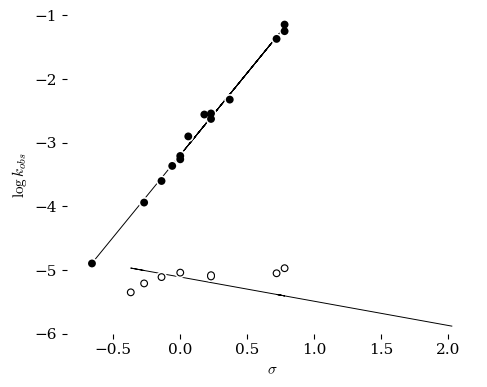

Acid Series (open circles)
slope  = -0.4
intercept = -5.109
RSQ = 0.484
LinregressResult(slope=-0.38008125751350097, intercept=-5.108965504842751, rvalue=-0.6954666205901274, pvalue=0.03751181608028393, stderr=0.14842710495611836, intercept_stderr=0.11690198523447891)
Base Series (open circles)
slope  = 2.6
intercept = -3.192
RSQ = 0.995
LinregressResult(slope=2.575985249076933, intercept=-3.19161550198462, rvalue=0.9973835921481972, pvalue=4.60562418911027e-15, stderr=0.053898166320227786, intercept_stderr=0.022982911965939396)


In [9]:
#####################################################
### Get series of data to plot from the dataframe ###
#####################################################
print("A")
xa = combined_data_acid["sigma"]
ya =  combined_data_acid["log_k"]
xb = base_data["sigma"]
yb =  base_data["log_k"]

from scipy.stats import linregress
import matplotlib

##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

print("B")

style_file = "tufte.mplstyle"
plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

print("C")
#########################################
### Plot the data and the line fit.   ###
#########################################

#ax.plot(x, y, color='black', zorder=1, linewidth=0.7)

ax.scatter(xa,ya, s=64, color="white",  edgecolors = "none", zorder=2)
ax.scatter(xa,ya, s=32, color="black",  edgecolors = "none", zorder=2)
ax.scatter(xa,ya, s=16, color="white",  edgecolors = "none", alpha = 1, zorder=2)

ax.scatter(xb,yb, s=64, color="white", edgecolors = "none", zorder=3)
ax.scatter(xb,yb, s=32, color="black", edgecolors = "none", alpha = 1, zorder=3)

print("D")

if True:   # Flag to run or not. True = run this section, False = skip it
    linfita = linregress(xa,ya)
    fita = linfita.slope * xa + linfita.intercept
    ax.plot(xa, fita, color='black', zorder=1, linewidth=0.7)
    
    linfitb = linregress(xb,yb)
    fitb = linfitb.slope * xb + linfitb.intercept
    ax.plot(xb, fitb, color='black', zorder=1, linewidth=0.7)

print("E")

############################
### Set labels and scale ###
############################

ax.set(
#    title="Hammett Plot",       
          ylabel = r"$\log{k_{obs}}$", 
          xlabel = r"$\sigma$",                
#          xlim = [-.9,.9],                  
          ylim = [-6,-1]
         )



if False:    # Flag to run or not. True = run this section, False = skip it
    for name,x_place,y_place in zip(list(df.index),x,y):
        plt.annotate(name, # this is the text
                    (x_place,y_place), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(30,0), # distance from text to points (x,y)
                    ha='left') # horizontal alignment can be left, right or center




#plt.savefig("plot1.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots

#make_axes_area_auto_adjustable(ax)
#####################################
### Print the line fit parameters ###
#####################################
print("Acid Series (open circles)")
print(f"slope  = {linfita.slope:0.1f}")
print(f"intercept = {linfita.intercept:0.3f}")
print(f"RSQ = {(linfita.rvalue**2):0.3f}")
print(linfita)


print("Base Series (open circles)")
print(f"slope  = {linfitb.slope:0.1f}")
print(f"intercept = {linfitb.intercept:0.3f}")
print(f"RSQ = {(linfitb.rvalue**2):0.3f}")
print(linfitb)